In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('train_set.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15042 entries, 0 to 15041
Data columns (total 15 columns):
price            15042 non-null float64
bedrooms         15042 non-null int64
bathrooms        15042 non-null float64
sqft_living      15042 non-null int64
sqft_lot         15042 non-null int64
floors           15042 non-null float64
waterfront       15042 non-null float64
condition        15042 non-null int64
grade            15042 non-null int64
sqft_above       15042 non-null int64
sqft_basement    15042 non-null int64
yr_built         15042 non-null int64
yr_renovated     12389 non-null float64
zipcode          15042 non-null int64
density          15042 non-null float64
dtypes: float64(6), int64(9)
memory usage: 1.7 MB


### Use Dummy Variables for Categorical Variables

#### Identifying Categorical Variables

How many categories of bedroom or bathroom do you have?\
How many numeric values do you have?\
How do you interpret it?\
With every one additional bathroom, you might expect the house price to increase by _____.\
Does this approach make sense for other variables?

In [38]:
categorical = df[['floors', 'waterfront', 'condition', 'grade', 'yr_renovated', 'zipcode', 'price']]
categorical

,floors,waterfront,condition,grade,yr_renovated,zipcode,price
0,1.0,0.0,4,7,0.0,98070,482000.0
1,2.0,1.0,3,11,0.0,98118,1610000.0
2,2.0,0.0,3,7,NaN,98115,410000.0
3,1.0,0.0,4,7,0.0,98133,390000.0
4,2.0,0.0,3,8,NaN,98029,550000.0
...,...,...,...,...,...,...,...
15037,1.0,0.0,4,5,0.0,98056,199500.0
15038,1.0,0.0,4,7,0.0,98023,235000.0
15039,1.5,0.0,3,6,NaN,98144,350000.0
15040,1.0,0.0,4,7,0.0,98055,325500.0


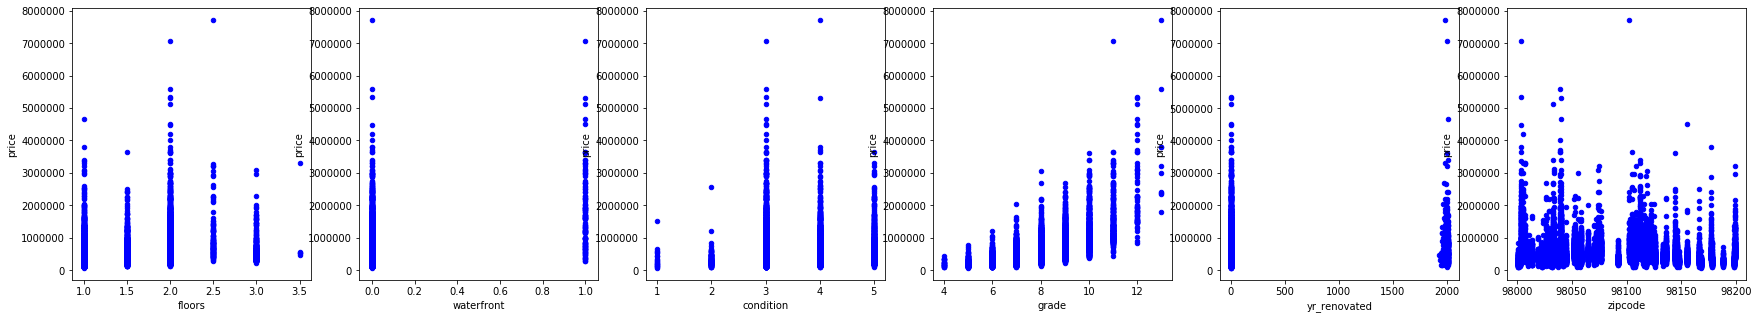

In [39]:
# visualize categorical variables with scatter plots
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(30,5))

for xcol, ax in zip(['floors', 'waterfront', 'condition', 'grade', 'yr_renovated', 'zipcode'], axes):
    categorical.plot(kind='scatter', x=xcol, y='price', ax=ax, color='b')

In [40]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,density
0,482000.0,3,1.75,2600,105587,1.0,0.0,4,7,1300,1300,1980,0.0,98070,0.024624
1,1610000.0,4,2.75,5470,18200,2.0,1.0,3,11,3730,1740,1992,0.0,98118,0.300549
2,410000.0,2,1.50,1180,1034,2.0,0.0,3,7,1120,60,2001,NaN,98115,1.141199
3,390000.0,4,1.75,2180,7560,1.0,0.0,4,7,1560,620,1962,0.0,98133,0.288360
4,550000.0,3,2.50,2010,2261,2.0,0.0,3,8,1390,620,2014,NaN,98029,0.888987


In [41]:
# Create a column to simplify the grade column
# under 6 = mostly flat
# 6-9 = low slope
# 9-12 = hilly
# 12+ = steep

df['grade_cat'] = np.where(df.grade >= 12, 'Steep', (np.where((df.grade < 12) & (df.grade >= 9), 
                    'Hilly', (np.where((df.grade < 9) & (df.grade >=6), 'Low Slope', 'Flat')))))

In [42]:
# Create a column to simplify the yr_renovated column
# 0 is 'Not Renovated'
# < 2000 is 'Prior to 2000'
# >= 2000 is '2000 to Present'
df['renovated_cat'] = np.where(df.yr_renovated >= 2000, '2000 to Present', (np.where((df.yr_renovated < 2000) & (df.grade > 0), 
                    'Prior to 2000', 'Not Renovated')))

In [43]:
# Create a column to simplify the zipcode column

# The zipcodes for "urban" are the zip codes found in Seattle, WA

urban = [98177, 98117, 98107, 98199, 98119, 98109, 98103, 98133, 98125, 98155, 98115,
         98105, 98112, 98102, 98122, 98144, 98108, 98118, 98116, 98121, 98101, 98154, 
         98104, 98134, 98106, 98126, 98136, 98146, 98168, 98178]

df['zipcode_cat'] = ['urban' if x in urban else 'suburban' for x in df['zipcode']]

In [44]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,density,grade_cat,renovated_cat,zipcode_cat
0,482000.0,3,1.75,2600,105587,1.0,0.0,4,7,1300,1300,1980,0.0,98070,0.024624,Low Slope,Prior to 2000,suburban
1,1610000.0,4,2.75,5470,18200,2.0,1.0,3,11,3730,1740,1992,0.0,98118,0.300549,Hilly,Prior to 2000,urban
2,410000.0,2,1.50,1180,1034,2.0,0.0,3,7,1120,60,2001,NaN,98115,1.141199,Low Slope,Not Renovated,urban
3,390000.0,4,1.75,2180,7560,1.0,0.0,4,7,1560,620,1962,0.0,98133,0.288360,Low Slope,Prior to 2000,urban
4,550000.0,3,2.50,2010,2261,2.0,0.0,3,8,1390,620,2014,NaN,98029,0.888987,Low Slope,Not Renovated,suburban


## Prepare the data for the Regression Model

In [45]:
df_num = df.drop("price", axis=1) # drop labels for training set
y = df["price"].copy()

In [46]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median");

In [47]:
df_num = df_num.drop(columns = ['floors', 'waterfront', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'grade_cat', 'renovated_cat', 'zipcode_cat'], axis=1)

In [48]:
imputer.fit(df_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [49]:
X = imputer.transform(df_num)

In [50]:
grade_cat = df[['grade_cat']]
renovated_cat = df[['renovated_cat']]
zipcode_cat = df[['zipcode_cat']]

In [51]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20
    
cat_encoder = OneHotEncoder()

In [52]:
grade_cat_1hot = cat_encoder.fit_transform(grade_cat)
grade_cats = cat_encoder.categories_[0].tolist()

renovated_cat_1hot = cat_encoder.fit_transform(renovated_cat)
renovated_cats = cat_encoder.categories_[0].tolist()

zipcode_cat_1hot = cat_encoder.fit_transform(zipcode_cat)
zipcode_cats = cat_encoder.categories_[0].tolist()

In [53]:
X = np.c_[(X, grade_cat_1hot.toarray(), renovated_cat_1hot.toarray(), zipcode_cat_1hot.toarray())]

In [54]:
cols = df_num.columns.tolist() + grade_cats + renovated_cats + zipcode_cats
df_tr = pd.DataFrame(X, columns = cols, index = df.index)

In [55]:
df_tr.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,density,Flat,Hilly,Low Slope,Steep,2000 to Present,Not Renovated,Prior to 2000,suburban,urban
0,3.0,1.75,2600.0,105587.0,1300.0,1300.0,0.024624,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,4.0,2.75,5470.0,18200.0,3730.0,1740.0,0.300549,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2.0,1.50,1180.0,1034.0,1120.0,60.0,1.141199,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4.0,1.75,2180.0,7560.0,1560.0,620.0,0.288360,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,3.0,2.50,2010.0,2261.0,1390.0,620.0,0.888987,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


---

ValueError: x and y must be the same size

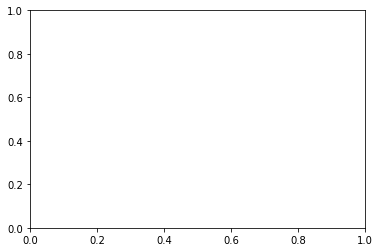

In [69]:
plt.scatter(df_tr, df.price)

## Create Model

In [64]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mlr_model = ols(formula='price~weight+horsepower+displacement+cylinders+acceleration', data=df).fit()
mlr_model.summary()

## Linear Regression with sklearn

In [56]:
## import necessary tools
from sklearn.linear_model import LinearRegression

## prepare(Instantiate) LinearRegression to use
lr = LinearRegression()

y = df["price"].copy()

## use the 'tool': fit the model
## coefficients are learnt and stored in "lr" at this step
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now `lr` object has all the information we need for this linear regression problem.

In [57]:
## Check coefficients

lr.coef_

array([-4.04529317e+04,  1.27860480e+04,  1.71200396e+02, -3.03832999e-01,
        7.60014563e+01,  9.51989392e+01, -2.29322883e+04, -3.23765929e+05,
       -1.45606805e+05, -3.32610525e+05,  8.01983260e+05,  1.05645972e+05,
       -4.89827435e+04, -5.66632281e+04, -7.47170031e+04,  7.47170031e+04])

In [58]:
## check the intercept of the model

lr.intercept_

504888.70453748

In [59]:
## make predictions

## Note that in our data each house is recorded with 13 features
## So we should give 13 features into lr.predict

lr.predict(X[5, np.newaxis])

array([473093.50916682])

In [60]:
y_pred = lr.predict(X)

In [61]:
lr.score(X, y)

0.6026736832531829

In [62]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y, y_pred)
lin_mae

151791.51035525333

## Model Selection

In [65]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
cross_val_score(estimator=lr, X=X, y=y, cv = 2)

array([0.5802146 , 0.61937544])

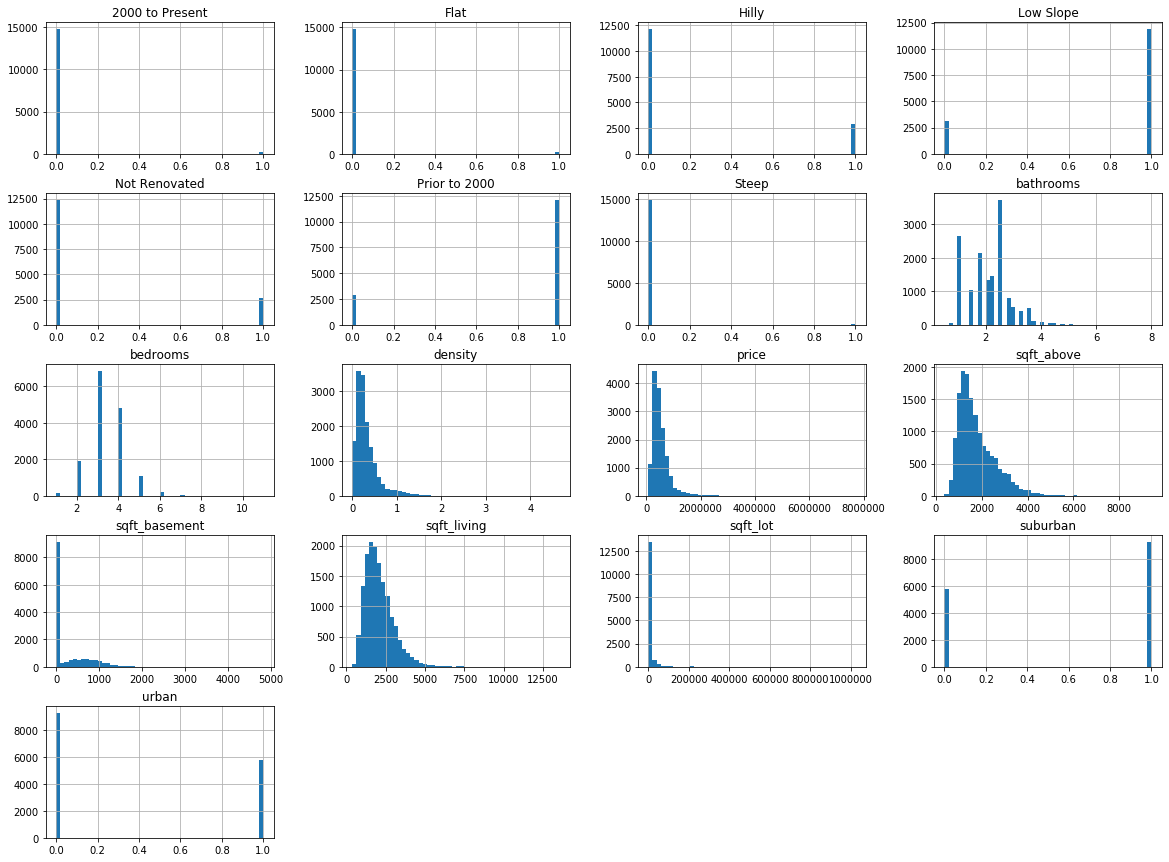

In [28]:
df_tr.hist(bins=50, figsize=(20,15));

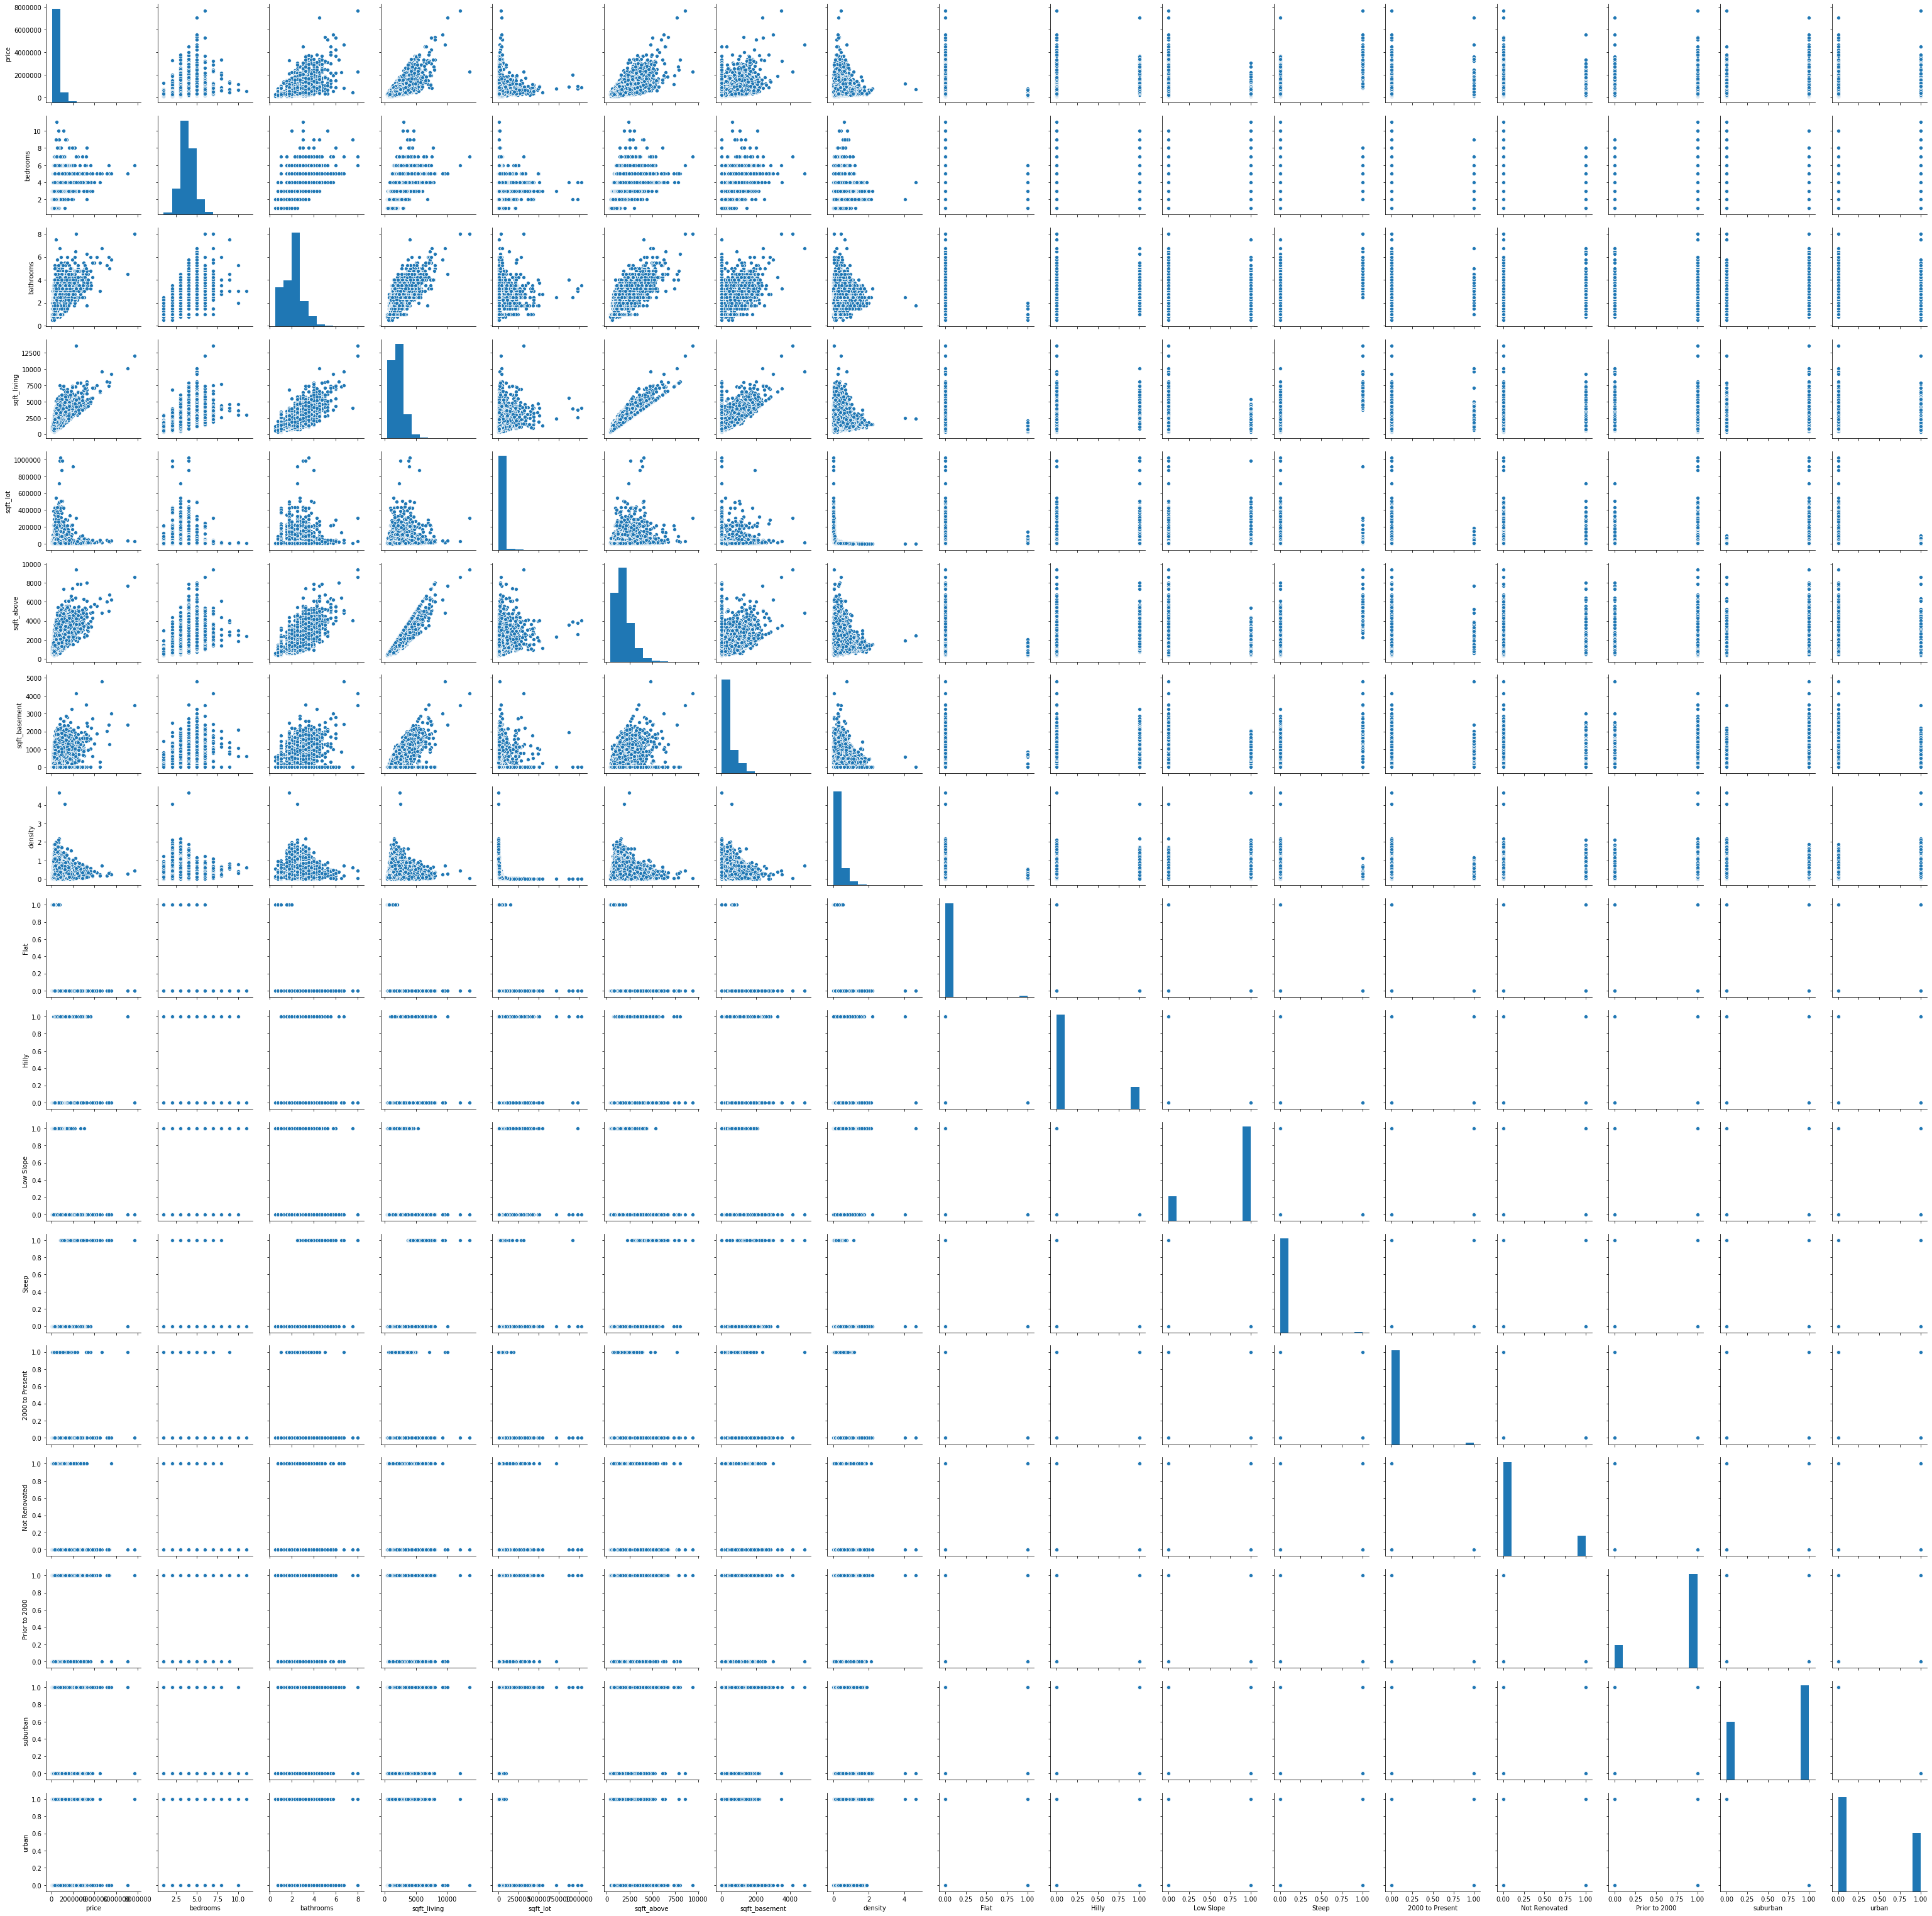

In [19]:
sns.pairplot(df_tr)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


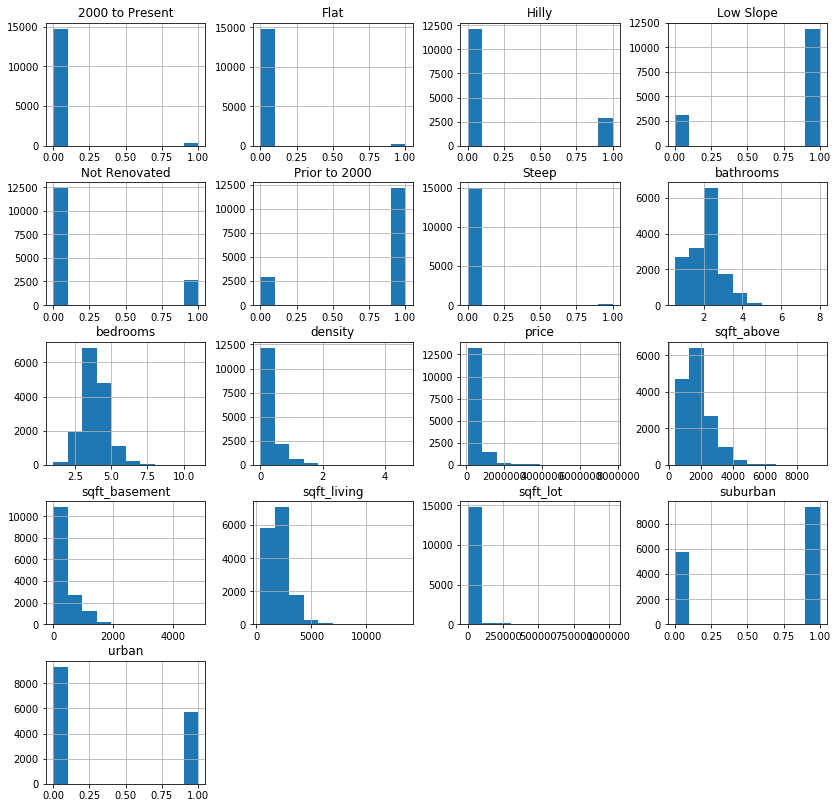

In [20]:
fig = plt.figure(figsize = (14,14))
ax = fig.gca()
df_tr.hist(ax = ax);

## Create Subset of DataFrame with Continuous Variables

In [25]:
df_cont = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'grade']]
df_cont

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,grade
0,3,1.75,2600,105587,1300,7
1,4,2.75,5470,18200,3730,11
2,2,1.50,1180,1034,1120,7
3,4,1.75,2180,7560,1560,7
4,3,2.50,2010,2261,1390,8
...,...,...,...,...,...,...
15037,4,2.00,1750,8116,1750,5
15038,3,2.00,1900,7980,1340,7
15039,4,2.75,2300,3175,1340,6
15040,4,1.75,2290,8142,1490,7


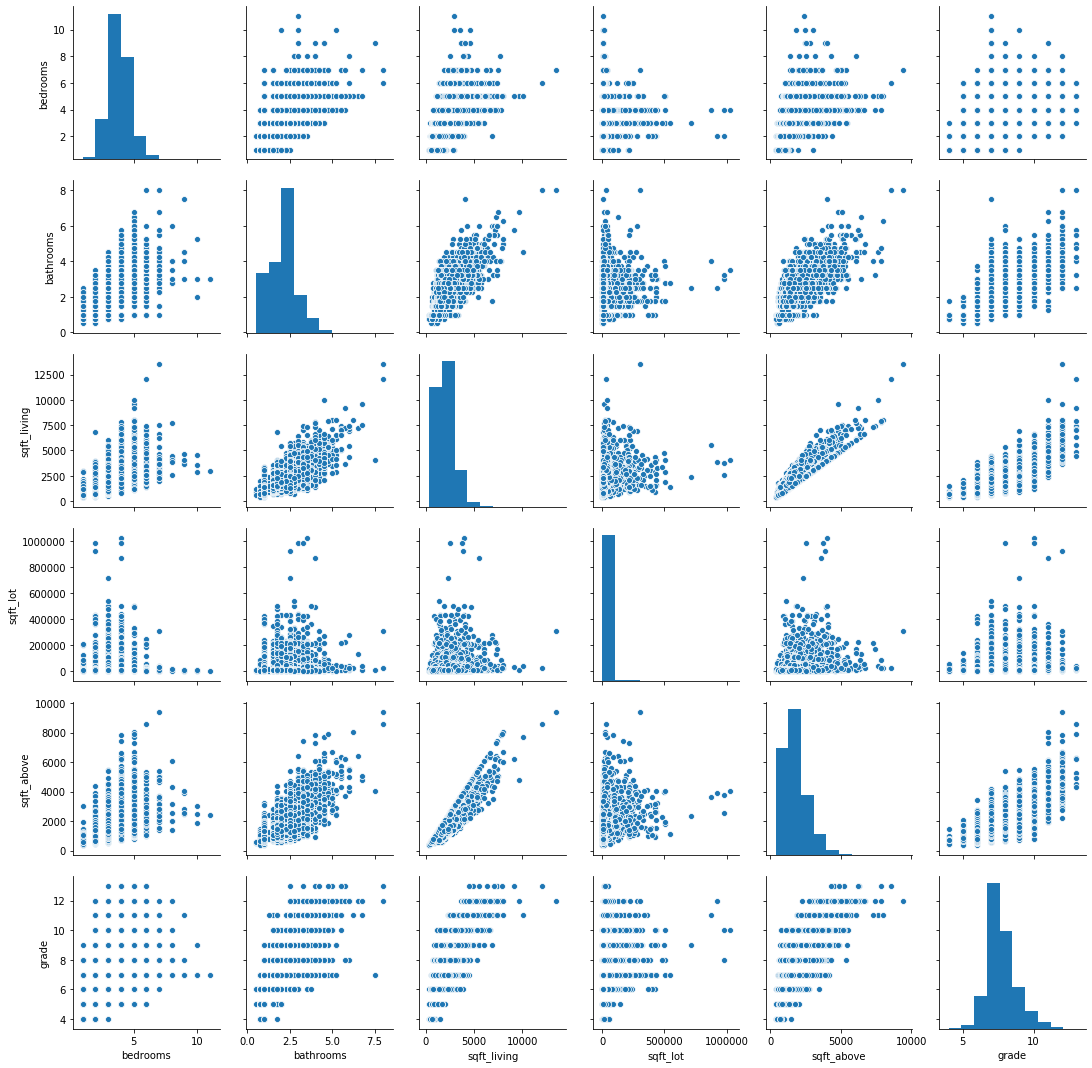

In [26]:
sns.pairplot(df_cont)

## Testing for Linearity

Text(0.5, 1.0, 'Year Built Versus Price')

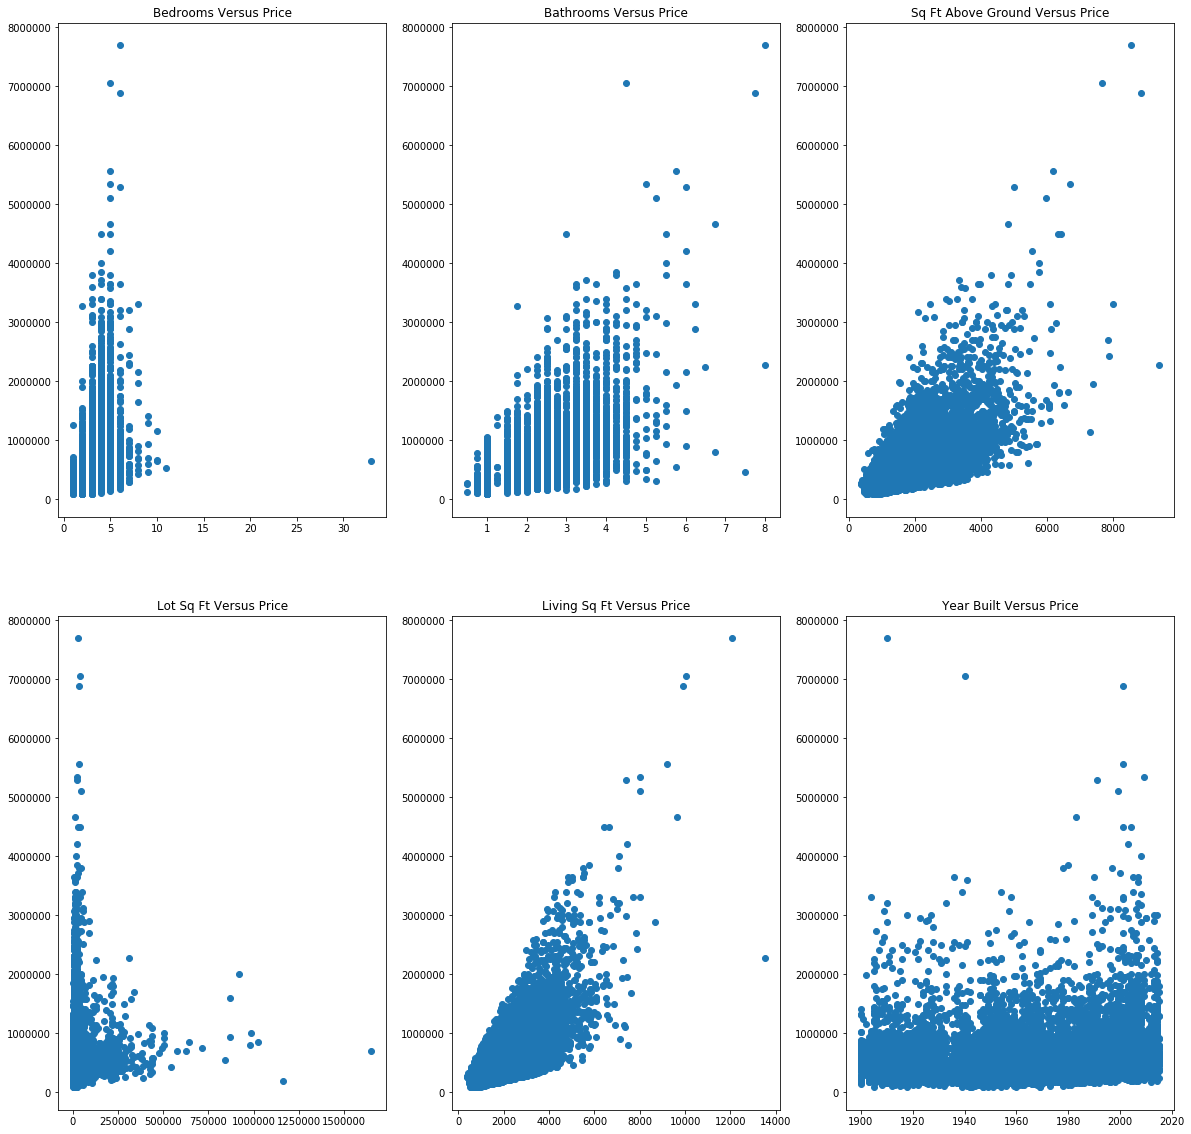

In [8]:
fig, axs = plt.subplots(2,3, figsize=(20,20))

axs[0,0].scatter(df_data['bedrooms'], df_data['price'])
axs[0,0].set_title('Bedrooms Versus Price')

axs[0,1].scatter(df_data['bathrooms'], df_data['price'])
axs[0,1].set_title('Bathrooms Versus Price')

axs[0,2].scatter(df_data['sqft_above'], df_data['price'])
axs[0,2].set_title('Sq Ft Above Ground Versus Price')

axs[1,1].scatter(df_data['sqft_living'], df_data['price'])
axs[1,1].set_title('Living Sq Ft Versus Price')

axs[1,0].scatter(df_data['sqft_lot'], df_data['price'])
axs[1,0].set_title('Lot Sq Ft Versus Price')

axs[1,2].scatter(df_data['grade'], df_data['price'])
axs[1,2].set_title('Grade Versus Price')

##### Decided to take out Year Built and add Grade, because year built is not linear and grade is approximately linear. 

In [9]:
# redefining our continuous variables
df_cont = df_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'grade']]

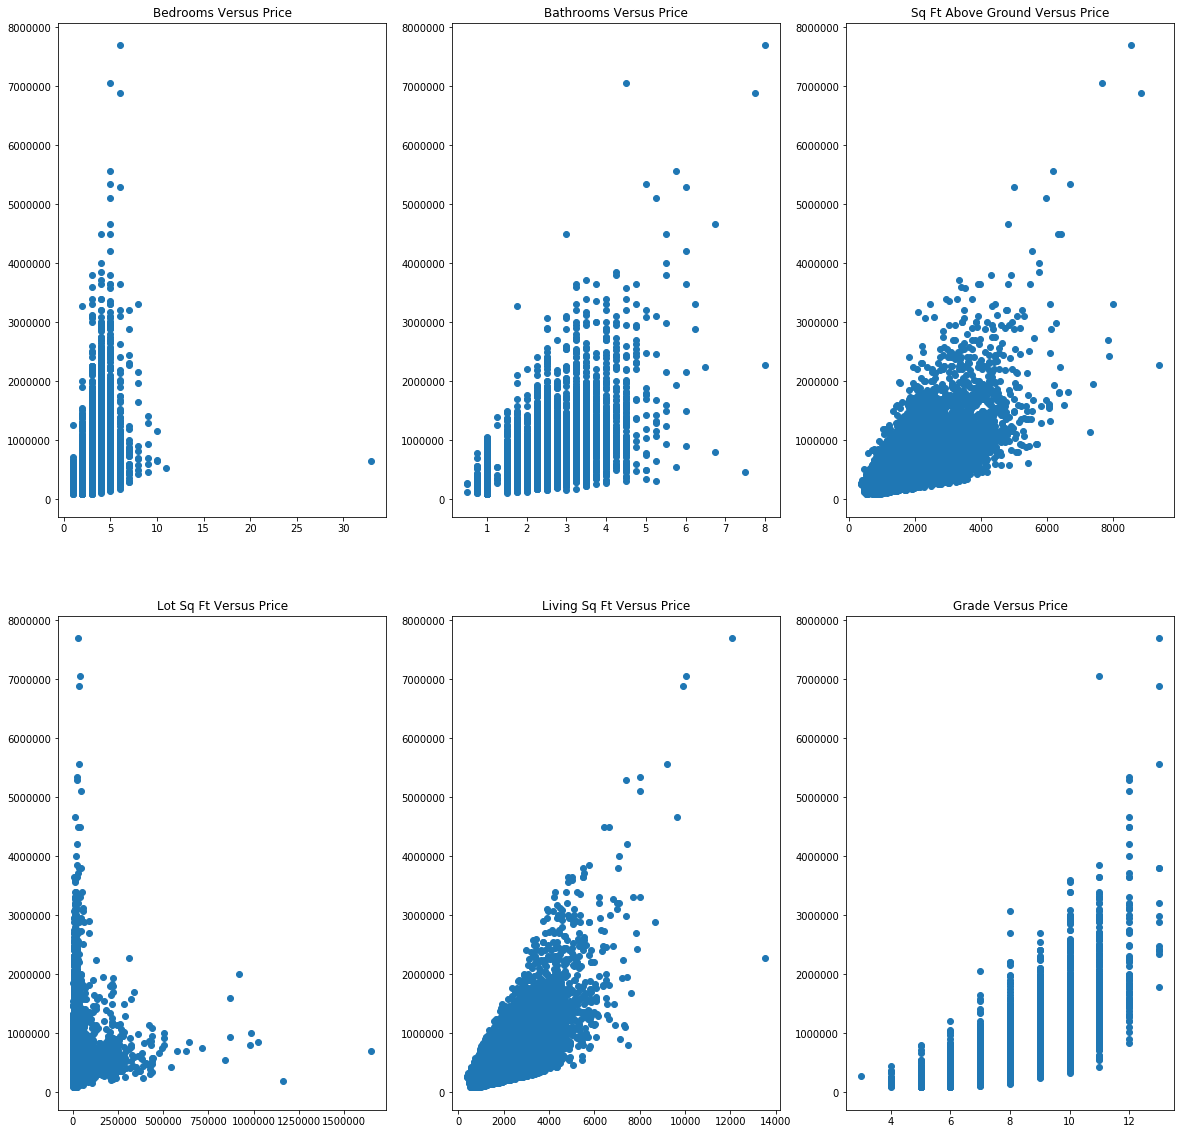

In [10]:
#re-plotting to confirm linearity
#Grade is a discrete variable, but there is a strong relationship which is close to linear, so we decided to include it. 

fig, axs = plt.subplots(2,3, figsize=(20,20))

axs[0,0].scatter(df_data['bedrooms'], df_data['price'])
axs[0,0].set_title('Bedrooms Versus Price')

axs[0,1].scatter(df_data['bathrooms'], df_data['price'])
axs[0,1].set_title('Bathrooms Versus Price')

axs[0,2].scatter(df_data['sqft_above'], df_data['price'])
axs[0,2].set_title('Sq Ft Above Ground Versus Price')

axs[1,1].scatter(df_data['sqft_living'], df_data['price'])
axs[1,1].set_title('Living Sq Ft Versus Price')

axs[1,0].scatter(df_data['sqft_lot'], df_data['price'])
axs[1,0].set_title('Lot Sq Ft Versus Price')

axs[1,2].scatter(df_data['grade'], df_data['price'])
axs[1,2].set_title('Grade Versus Price');


#### Inserting Dummy Variables

##### Identifying Categorical Variables

In [58]:
categorical = df_data[['floors', 'waterfront', 'condition', 'grade', 'yr_renovated', 'zipcode', 'price']]
categorical

,floors,waterfront,condition,grade,yr_renovated,zipcode,price
1,2.0,0.0,3,7,1991.0,98125,538000.0
2,1.0,0.0,3,6,NaN,98028,180000.0
3,1.0,0.0,5,7,0.0,98136,604000.0
4,1.0,0.0,3,8,0.0,98074,510000.0
5,1.0,0.0,3,11,0.0,98053,1230000.0
...,...,...,...,...,...,...,...
21591,2.0,0.0,3,8,0.0,98116,475000.0
21592,3.0,0.0,3,8,0.0,98103,360000.0
21593,2.0,0.0,3,8,0.0,98146,400000.0
21594,2.0,0.0,3,7,0.0,98144,402101.0


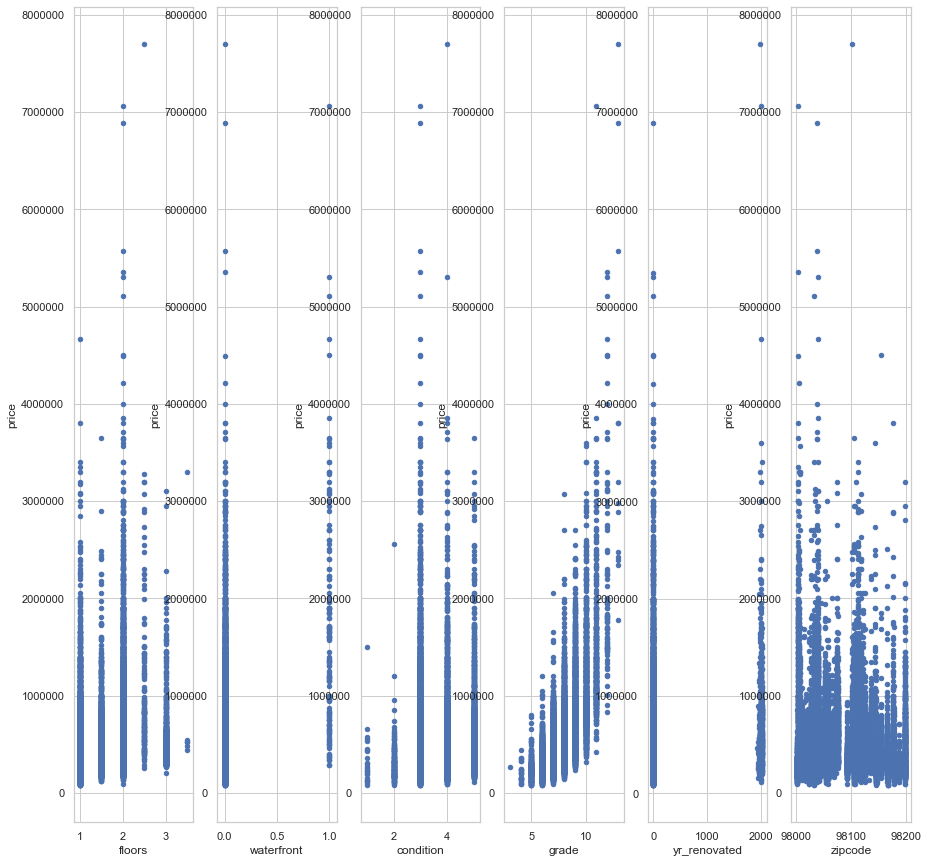

In [61]:
#method from learn
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,15))

for xcol, ax in zip(['floors', 'waterfront', 'condition', 'grade', 'yr_renovated', 'zipcode'], axes):
    categorical.plot(kind='scatter', x=xcol, y='price', ax=ax, color='b')

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

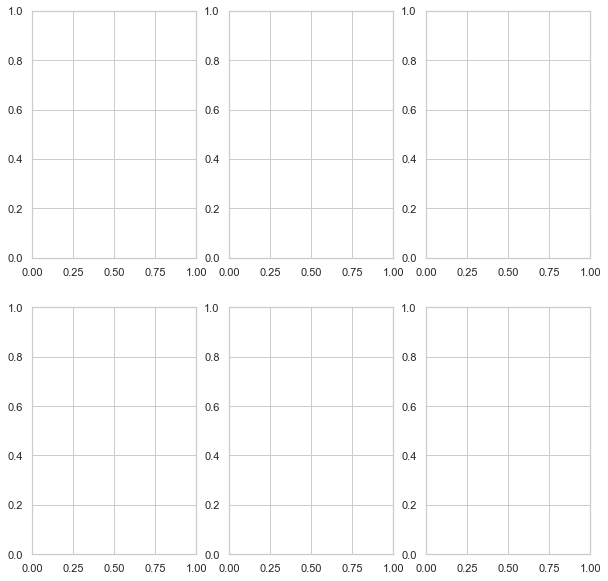

In [54]:
#method using for loop and enumerate

for i, (key, categorical) in enumerate(gb):
    categorical.plot(ax=axes[0][i])


for i, (key, df2) in enumerate(gb):
    df2.plot(ax=axes[0][i])



#### Checking Distribution of Variables

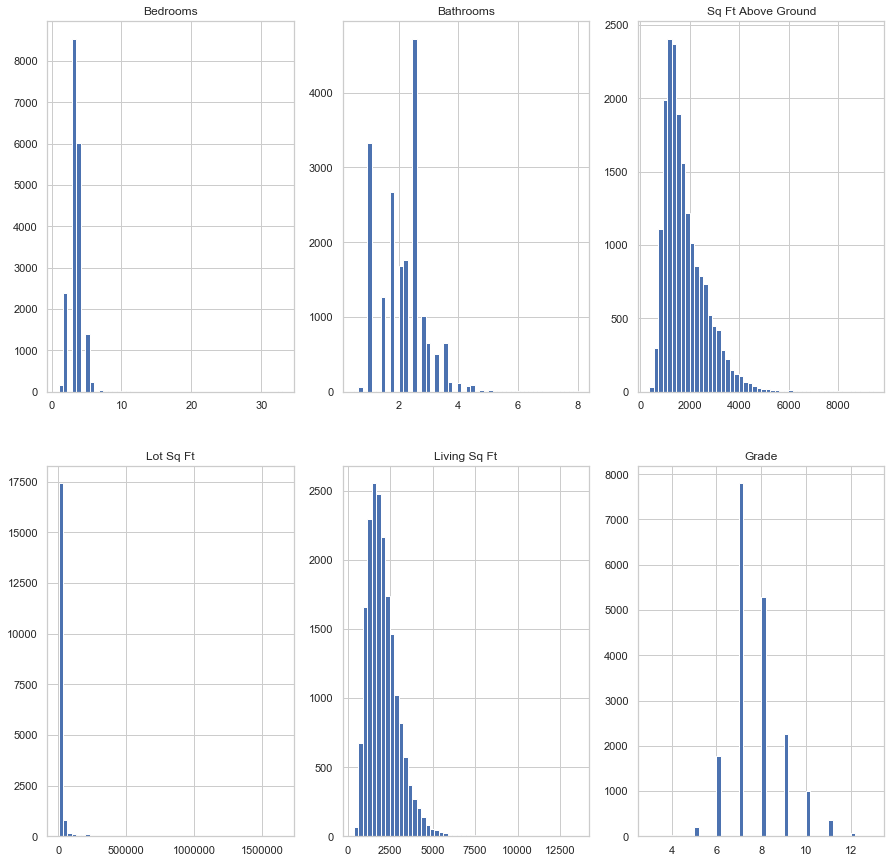

In [47]:
fig, axs = plt.subplots(2,3, figsize=(15,15))

axs[0,0].hist(df_data['bedrooms'], bins=50)
axs[0,0].set_title('Bedrooms')

axs[0,1].hist(df_data['bathrooms'], bins=50)
axs[0,1].set_title('Bathrooms')

axs[0,2].hist(df_data['sqft_above'], bins=50)
axs[0,2].set_title('Sq Ft Above Ground')

axs[1,1].hist(df_data['sqft_living'], bins=50)
axs[1,1].set_title('Living Sq Ft')

axs[1,0].hist(df_data['sqft_lot'], bins=50)
axs[1,0].set_title('Lot Sq Ft')

axs[1,2].hist(df_data['grade'], bins=50)
axs[1,2].set_title('Grade');

Our variables are not normally distributed, except for grade. 

### Q-Q Plots

## Determine Colinearity

Text(0.5, 1.0, 'Graphical Colinearity Test')

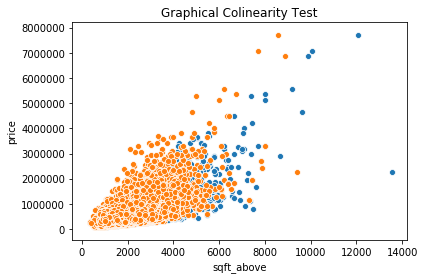

In [92]:
import seaborn as sns
sns.scatterplot(x=df_data['sqft_living'], y=df_data['price'], legend='full').set_title('Living Space Per Sales Price')

import seaborn as sns
sns.scatterplot(x=df_data['sqft_above'], y=df_data['price']).set_title('Graphical Colinearity Test')

#df.plot.scatter(x='sqft_living', y='price')

Text(0.5, 1.0, 'Bathrooms Versus Price')

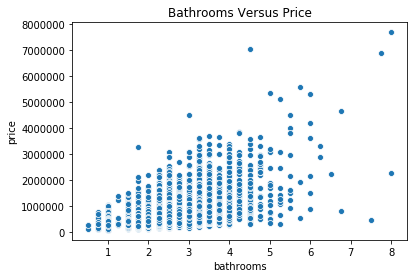

In [93]:
import seaborn as sns
sns.scatterplot(x=df_data['bathrooms'], y=df_data['price']).set_title('Bathrooms Versus Price')

Conclusion: sqft_above and sqft_living are colinear. Remove sqft_above.

In [53]:
#correlation matrix
df_cont.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built
bedrooms,1.000000,0.514508,0.578212,0.032471,0.479386,0.155670
bathrooms,0.514508,1.000000,0.755758,0.088373,0.686668,0.507173
sqft_living,0.578212,0.755758,1.000000,0.173453,0.876448,0.318152
sqft_lot,0.032471,0.088373,0.173453,1.000000,0.184139,0.052946
sqft_above,0.479386,0.686668,0.876448,0.184139,1.000000,0.424037
yr_built,0.155670,0.507173,0.318152,0.052946,0.424037,1.000000


- correlations take a value between -1 and 1, -1 being a perfectly negative linear relationship, and +1 a perfectly positive linear relationship.

In [65]:
df_corr = df_cont.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

df_corr.set_index(['pairs'], inplace=True)

df_corr.drop(columns=['level_1', 'level_0'], inplace=True)

df_corr.columns = ['cc']

df_corr.drop_duplicates(inplace=True)

df_corr

,cc
pairs,
"(bedrooms, bedrooms)",1.000000
"(sqft_living, sqft_above)",0.876448
"(sqft_living, bathrooms)",0.755758
"(sqft_above, bathrooms)",0.686668
"(sqft_living, bedrooms)",0.578212
"(bedrooms, bathrooms)",0.514508
"(bathrooms, yr_built)",0.507173
"(bedrooms, sqft_above)",0.479386
"(sqft_above, yr_built)",0.424037


In [97]:
#this would be high correlation
df_corr[(df_corr.cc>.75) & (df_corr.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(sqft_living, bathrooms)",0.755758


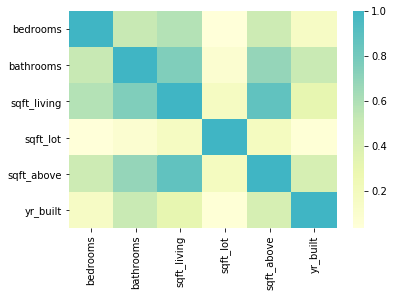

In [83]:
# look at setting color to 4 colors only

sns.heatmap(df_cont.corr(), center=1, cmap='YlGnBu');

The heatmap confirms that sqft_living, sqft_above, and bathrooms are correlated. So we should remove 2 of 3 variables.

## Normalize Data

### Log Transformation

In [19]:
df_cont.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built
0,3,1.00,1180,5650,1180,0.0,1955
1,3,2.25,2570,7242,2170,400.0,1951
2,2,1.00,770,10000,770,0.0,1933


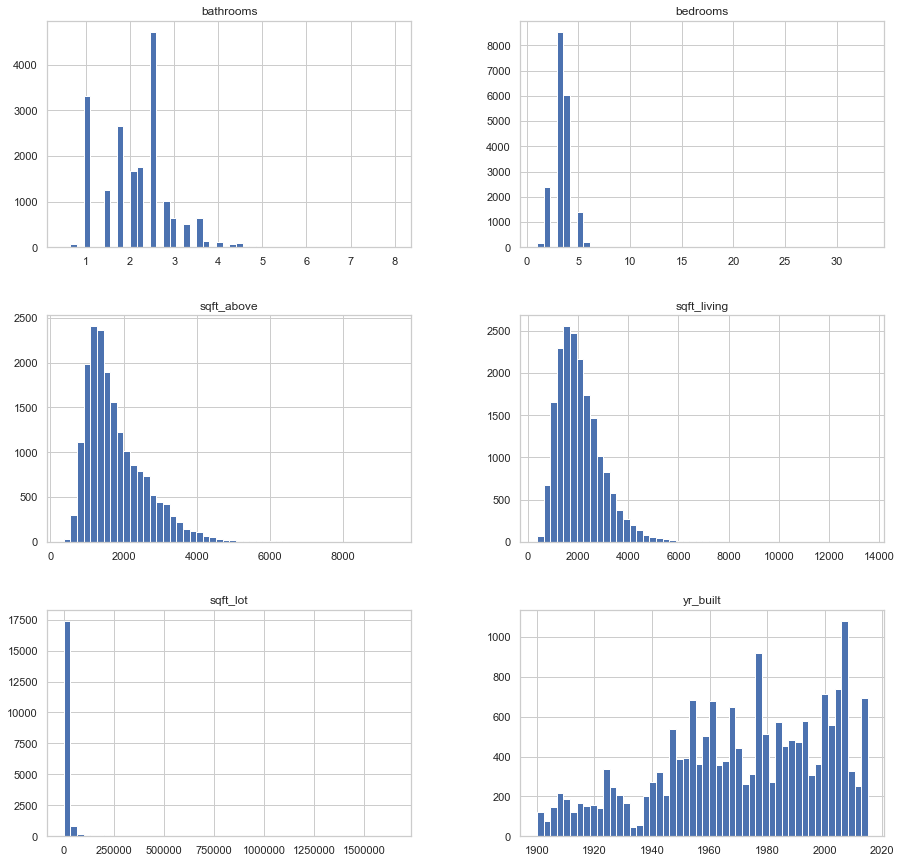

In [40]:
df_cont.hist(figsize = [15,15], bins=50);

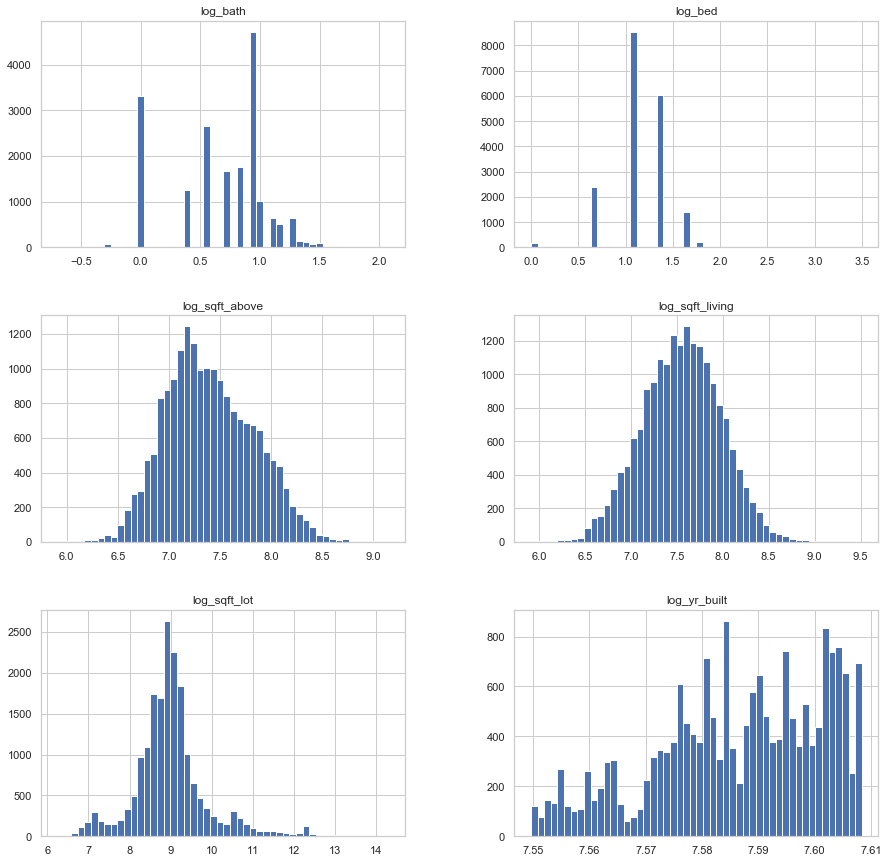

In [41]:
import numpy as np
df_cont_log = pd.DataFrame([])L
df_cont_log['log_bath'] = np.log(df_cont['bathrooms'])
df_cont_log['log_bed'] = np.log(df_cont['bedrooms'])L
df_cont_log['log_sqft_above'] = np.log(df_cont['sqft_above'])
df_cont_log['log_sqft_living'] = np.log(df_cont['sqft_living'])
df_cont_log['log_sqft_lot'] = np.log(df_cont['sqft_lot'])
df_cont_log['log_yr_built'] = np.log(df_cont['yr_built'])
df_cont_log.hist(figsize = [15,15], bins=50);

__Redo scatter plots to see if linearity is improved after log transformation.__

Text(0.5, 1.0, 'Log Year Built')

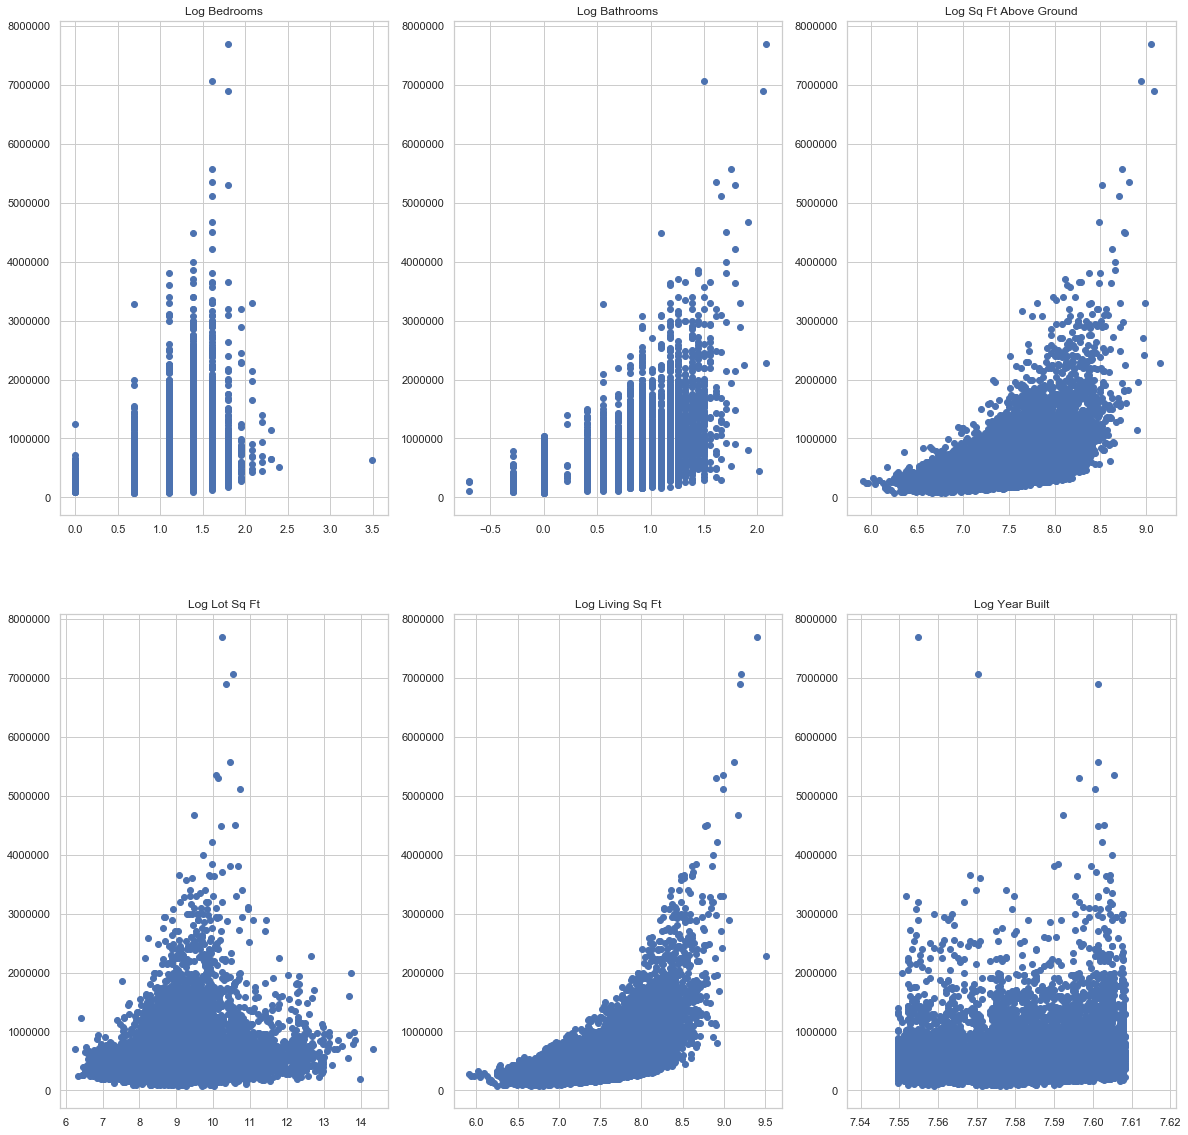

In [48]:
#Grade is a discrete variable, but there is a strong relationship which is close to linear, so we decided to include it. 

fig, axs = plt.subplots(2,3, figsize=(20,20))

axs[0,0].scatter(df_cont_log['log_bed'], df_data['price'])
axs[0,0].set_title('Log Bedrooms')

axs[0,1].scatter(df_cont_log['log_bath'], df_data['price'])
axs[0,1].set_title('Log Bathrooms')

axs[0,2].scatter(df_cont_log['log_sqft_above'], df_data['price'])
axs[0,2].set_title('Log Sq Ft Above Ground')

axs[1,1].scatter(df_cont_log['log_sqft_living'], df_data['price'])
axs[1,1].set_title('Log Living Sq Ft')

axs[1,0].scatter(df_cont_log['log_sqft_lot'], df_data['price'])
axs[1,0].set_title('Log Lot Sq Ft')

axs[1,2].scatter(df_cont_log['log_yr_built'], df_data['price'])
axs[1,2].set_title('Log Year Built')

#axs[1,2].scatter(df_data['grade'], df_data['price'])
#axs[1,2].set_title('Grade Versus Price');

Linearity is not improved, decided not to use log transformation.

### Min-Max Scaling, Standardization & Mean Normalization

In [29]:
# assigning a variable to the log transformation of each element

logbath = df_cont_log['log_bath']
logbed = df_cont_log['log_bed'] 
logsf = df_cont_log['log_sqft_above']
logsfliv = df_cont_log['log_sqft_living']
logsflot = df_cont_log['log_sqft_lot']



In [98]:
# creating functions for the transformations
# these are typically applied to every variable.

def min_max_scaling(element):
    """Transforms an element to bring all values between 0 and 1."""
    scaled_element = (element - min(element)) / (max(element) - min(element))
    return scaled_element

#most commonly used to get multiple variables on different scales to be on the same scale.
#scikit learn standard scaler
def standardization(element, sigma):
    """Changes the mean and standard error"""
    std_element = (element - np.mean(element)) / sigma
    return std_element

def mean_normalization(element):
    """  """
    norm_element = (element - np.mean(element)) / (max(element)- min(element))
    return norm_element


In [99]:
variables = [logbath, logbed, logsf, logsfliv, logsflot]
for i in variables:
    print(min_max_scaling(i))

0        0.250000
1        0.542481
2        0.250000
3        0.646241
4        0.500000
           ...   
21592    0.580482
21593    0.580482
21594    0.146241
21595    0.580482
21596    0.146241
Name: log_bath, Length: 21597, dtype: float64
0        0.314203
1        0.314203
2        0.198240
3        0.396480
4        0.314203
           ...   
21592    0.314203
21593    0.396480
21594    0.198240
21595    0.314203
21596    0.198240
Name: log_bed, Length: 21597, dtype: float64
0        0.358392
1        0.546652
2        0.226478
3        0.322322
4        0.467563
           ...   
21592    0.438662
21593    0.565972
21594    0.313364
21595    0.452486
21596    0.313364
Name: log_sqft_above, Length: 21597, dtype: float64
0        0.322166
1        0.538392
2        0.203585
3        0.463123
4        0.420302
           ...   
21592    0.394322
21593    0.508764
21594    0.281690
21595    0.406749
21596    0.281690
Name: log_sqft_living, Length: 21597, dtype: float64
0        0.2

In [100]:
df_scaled = pd.DataFrame([])

df_scaled['scaled_bath'] = min_max_scaling(logbath)
df_scaled['scaled_bed'] = min_max_scaling(logbed)
df_scaled['scaled_sf'] = min_max_scaling(logsf)
df_scaled['scaled_sfliv'] = min_max_scaling(logsfliv)
df_scaled['scaled_sflot'] = min_max_scaling(logsflot)

df_scaled.head(3)

,scaled_bath,scaled_bed,scaled_sf,scaled_sfliv,scaled_sflot
0,0.250000,0.314203,0.358392,0.322166,0.295858
1,0.542481,0.314203,0.546652,0.538392,0.326644
2,0.250000,0.198240,0.226478,0.203585,0.366664


## Create Model

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
formula = 'price~'

## Project Requirements

- Business Understanding
   - Have you clearly defined your goal for your analysis?
     
   *inputs  are zip code, income, features etc.
   *use input method
   *assign mean for other inputs
   *return a price prediction
   *output is price, affordability range, and show 5 comparable houses.

   - Have your thought about who your audience is and how they would use this information?
        People who are looking to buy a house.
   
   - How does this help the goals of the business/organization?
        This would give them insight to inform their policy and tax decisions as well as to create programs to help people afford homes. 

- Data Understanding
   - What data are you using?
        Using King County House Dataset provided as well as an equation for housing affordability from an industry standard.
   
   - How does your data help you answer the business question?
        Q1 which 3 features make more affordable homes
        * how do we determine top 3?
   
   - How many observations does your dataset contain?
        21597
        
   - What is the distribution of your data?
        not normal, so we will normalize.
        
   - What data types do you have?   
        int, float, year 

- Data Preparation

   - Have you looked/dealt with missing values?
        waterfront, view, year renovated.
        
   - Have you done any data-type conversion?
        not yet
        sqft_basement came in as an object, convert to int.
        
      - ex: numerical data incorrectly ‘typed’ as strings.
        
        Columns on x-axis:
        'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', density(added)
      
          determine linearity after plotting scatter plots of these
          determine co-linearity and remove these.
        
    - Does your data contain any outliers or non-sensical values?
        yes there are outliers
        revisit looking at scatter plots.